In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

87.21862058329472 50.09314665568971
-39.925527293232925 -111.12942066394633
19.916032537332143 -178.8184733279942
-72.30393332461732 -94.18636010084654
-49.059748205186 -132.1460112897181
-8.293100326987869 -26.558771422720383
19.815878604828768 153.49949408570035
28.619101761719705 82.68603497300438
-0.2496483101240159 -134.01976353475987
-1.5539671523477239 56.41625034989434
60.62830579530896 -8.07806944553272
-81.42047489973775 -49.5566813363703
46.92639065365009 36.533462555875076
-78.37406719971679 -89.65320754056063
9.602064604660214 -89.73753453578159
55.004983838714395 -28.19322554617426
2.7385514766969266 -111.2631883496626
-89.4636447727478 -116.94259901340985
71.55284353171837 -26.156129342269026
85.85187980225231 25.64636166460457
-17.253951148719338 11.666486068274708
8.119963455117258 164.77189345805033
53.649705424851504 179.3137502016379
-69.79949117764166 8.563356703431168
-46.47884466812028 78.02684248265302
-42.04884051469393 -56.52820886434077
-21.302369897207655 74

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [7]:
from dotenv import load_dotenv

load_dotenv() 

True

In [8]:
import os
print(os.getenv("open_weather"))

68aafe498c27cc0370d51ba409ab55b0


In [9]:
weather_api_key = os.getenv("open_weather")

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68aafe498c27cc0370d51ba409ab55b0


In [11]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68aafe498c27cc0370d51ba409ab55b0&q=Boston


In [12]:
import requests
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
import requests
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [15]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":85.08,"feels_like":84.24,"temp_min":80.92,"temp_max":88.23,"pressure":1014,"humidity":39},"visibility":10000,"wind":{"speed":11.99,"deg":337,"gust":20},"clouds":{"all":1},"dt":1659211136,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1659173678,"sunset":1659225991},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [18]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(10)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 12 | rikitea
Processing Record 3 of Set 12 | kapaa
Processing Record 4 of Set 12 | punta arenas
Processing Record 5 of Set 12 | pitimbu
Processing Record 6 of Set 12 | katsuura
Processing Record 7 of Set 12 | tulsipur
Processing Record 8 of Set 12 | atuona
Processing Record 9 of Set 12 | victoria
Processing Record 10 of Set 12 | toftir
City not found. Skipping...
Processing Record 11 of Set 12 | ushuaia
Processing Record 12 of Set 12 | osypenko
Processing Record 13 of Set 12 | corinto
Processing Record 14 of Set 12 | grindavik
Processing Record 15 of Set 12 | coahuayana
Processing Record 16 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 12 | longyearbyen
Processing Record 18 of Set 12 | namibe
Processing Record 19 of Set 12 | butaritari
Processing Record 20 of Set 12 | beringovskiy
Processing Record 21 of Set 12 | hermanus
Processing Record 22 of Se

Processing Record 33 of Set 15 | sawakin
Processing Record 34 of Set 15 | ahome
Processing Record 35 of Set 15 | tezu
Processing Record 36 of Set 15 | aflu
City not found. Skipping...
Processing Record 37 of Set 15 | la palma
Processing Record 38 of Set 15 | santa isabel do rio negro
Processing Record 39 of Set 15 | whakatane
Processing Record 40 of Set 15 | ahipara
Processing Record 41 of Set 15 | sahuaripa
Processing Record 42 of Set 15 | butka
Processing Record 43 of Set 15 | moron
Processing Record 44 of Set 15 | caravelas
Processing Record 45 of Set 15 | mendahara
City not found. Skipping...
Processing Record 46 of Set 15 | ahumada
City not found. Skipping...
Processing Record 47 of Set 15 | havelock
Processing Record 48 of Set 15 | faya
Processing Record 49 of Set 15 | jutai
Processing Record 50 of Set 15 | verkhnevilyuysk
Processing Record 1 of Set 16 | mogadishu
Processing Record 2 of Set 16 | kuzino
Processing Record 3 of Set 16 | chuy
Processing Record 4 of Set 16 | jalu
Proc

Processing Record 17 of Set 19 | ponta do sol
Processing Record 18 of Set 19 | aden
Processing Record 19 of Set 19 | severo-yeniseyskiy
Processing Record 20 of Set 19 | tabuk
Processing Record 21 of Set 19 | porbandar
Processing Record 22 of Set 19 | troitskoye
Processing Record 23 of Set 19 | kulhudhuffushi
Processing Record 24 of Set 19 | vostok
Processing Record 25 of Set 19 | lagoa
Processing Record 26 of Set 19 | shibetsu
Processing Record 27 of Set 19 | fare
Processing Record 28 of Set 19 | abha
Processing Record 29 of Set 19 | isugod
Processing Record 30 of Set 19 | ardakan
Processing Record 31 of Set 19 | chateauroux
Processing Record 32 of Set 19 | te anau
Processing Record 33 of Set 19 | manggar
Processing Record 34 of Set 19 | cairns
Processing Record 35 of Set 19 | souillac
Processing Record 36 of Set 19 | esperance
Processing Record 37 of Set 19 | ajdabiya
Processing Record 38 of Set 19 | amot
Processing Record 39 of Set 19 | bismarck
Processing Record 40 of Set 19 | elat


Processing Record 4 of Set 23 | labuan
Processing Record 5 of Set 23 | genhe
Processing Record 6 of Set 23 | hualmay
Processing Record 7 of Set 23 | sterling
Processing Record 8 of Set 23 | sept-iles
Processing Record 9 of Set 23 | tilichiki
Processing Record 10 of Set 23 | hokitika
Processing Record 11 of Set 23 | faridpur
Processing Record 12 of Set 23 | gberia fotombu
Processing Record 13 of Set 23 | sungaipenuh
Processing Record 14 of Set 23 | pekan
Processing Record 15 of Set 23 | utiroa
City not found. Skipping...
Processing Record 16 of Set 23 | axim
Processing Record 17 of Set 23 | ilo
Processing Record 18 of Set 23 | vao
Processing Record 19 of Set 23 | poltavka
Processing Record 20 of Set 23 | bet shemesh
Processing Record 21 of Set 23 | henties bay
Processing Record 22 of Set 23 | mitsamiouli
Processing Record 23 of Set 23 | rena
Processing Record 24 of Set 23 | dingle
Processing Record 25 of Set 23 | tucurui
Processing Record 26 of Set 23 | buraydah
Processing Record 27 of 

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.55,75,5,17.22,PF,2022-07-30 20:04:34
1,Kapaa,22.0752,-159.3190,83.12,75,66,5.01,US,2022-07-30 20:00:54
2,Punta Arenas,-53.1500,-70.9167,46.11,61,100,26.80,CL,2022-07-30 20:02:23
3,Pitimbu,-7.4706,-34.8086,75.79,92,100,10.65,BR,2022-07-30 20:04:35
4,Katsuura,35.1333,140.3000,79.43,88,74,12.84,JP,2022-07-30 20:04:35
5,Tulsipur,28.1310,82.2973,74.37,90,82,2.89,NP,2022-07-30 20:04:35
6,Atuona,-9.8000,-139.0333,76.89,77,9,16.04,PF,2022-07-30 20:04:36
7,Victoria,22.2855,114.1577,86.32,87,45,11.36,HK,2022-07-30 20:02:27
8,Ushuaia,-54.8000,-68.3000,38.19,91,99,7.40,AR,2022-07-30 20:01:34
9,Osypenko,46.9136,36.8253,77.02,39,4,14.32,UA,2022-07-30 20:04:37


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [22]:
df = city_data_df[new_column_order]
df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-30 20:04:34,-23.1203,-134.9692,72.55,75,5,17.22
1,Kapaa,US,2022-07-30 20:00:54,22.0752,-159.3190,83.12,75,66,5.01
2,Punta Arenas,CL,2022-07-30 20:02:23,-53.1500,-70.9167,46.11,61,100,26.80
3,Pitimbu,BR,2022-07-30 20:04:35,-7.4706,-34.8086,75.79,92,100,10.65
4,Katsuura,JP,2022-07-30 20:04:35,35.1333,140.3000,79.43,88,74,12.84
...,...,...,...,...,...,...,...,...,...
533,Roald,NO,2022-07-30 20:11:51,62.5833,6.1333,62.91,88,75,2.30
534,Weyburn,CA,2022-07-30 20:11:52,49.6668,-103.8511,84.87,30,100,6.42
535,Nador,MA,2022-07-30 20:11:52,35.1740,-2.9287,80.85,89,100,6.91
536,Evensk,RU,2022-07-30 20:11:54,61.9500,159.2333,50.49,87,100,15.90


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

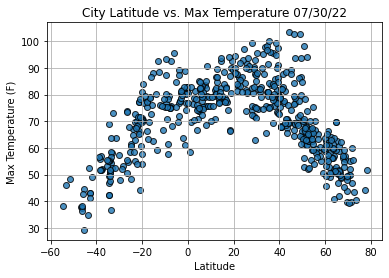

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

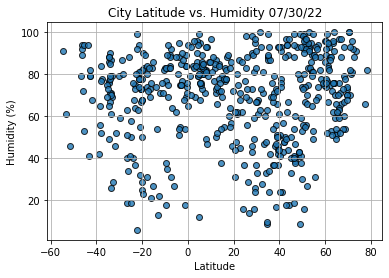

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

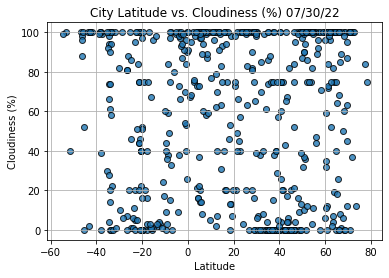

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

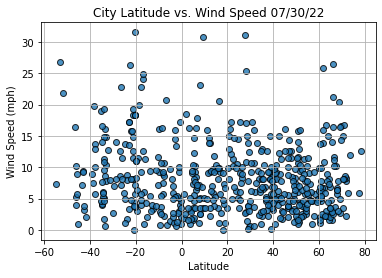

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
print (index13)

City                 Longyearbyen
Lat                       78.2186
Lng                       15.6401
Max Temp                    51.64
Humidity                       82
Cloudiness                     75
Wind Speed                  12.66
Country                        SJ
Date          2022-07-30 20:04:39
Name: 13, dtype: object


In [39]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
533     True
534     True
535     True
536     True
537     True
Name: Lat, Length: 538, dtype: bool

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kapaa,22.0752,-159.3190,83.12,75,66,5.01,US,2022-07-30 20:00:54
4,Katsuura,35.1333,140.3000,79.43,88,74,12.84,JP,2022-07-30 20:04:35
5,Tulsipur,28.1310,82.2973,74.37,90,82,2.89,NP,2022-07-30 20:04:35
7,Victoria,22.2855,114.1577,86.32,87,45,11.36,HK,2022-07-30 20:02:27
9,Osypenko,46.9136,36.8253,77.02,39,4,14.32,UA,2022-07-30 20:04:37


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

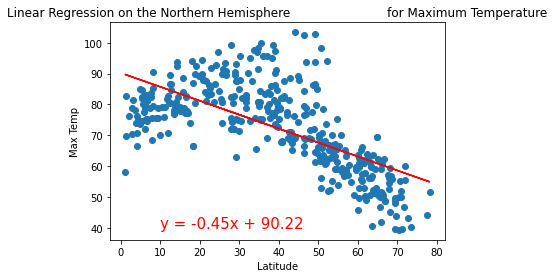

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

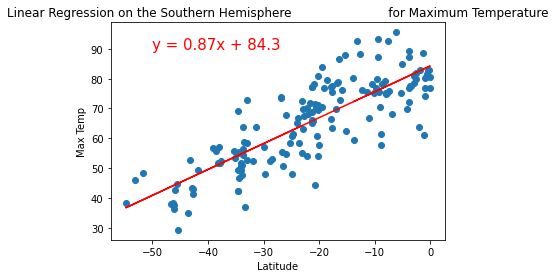

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

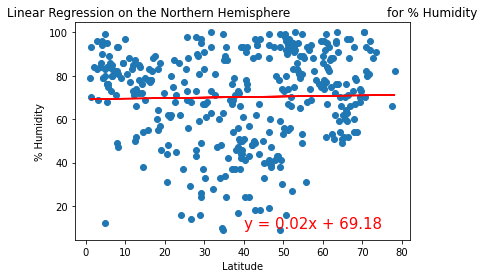

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

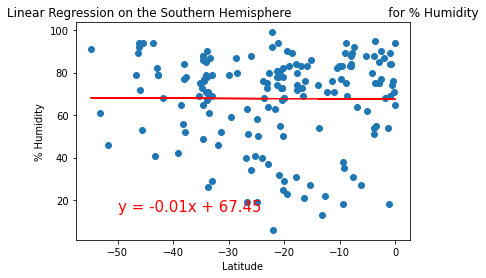

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

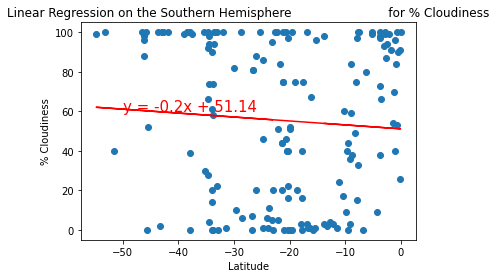

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

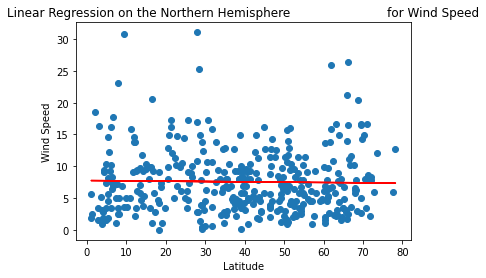

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

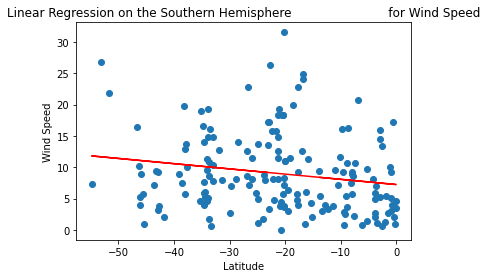

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))